### Pandas Study and Exercises

### Pandas Learning

In [2]:
!pip install pandas

In [1]:
import pandas as pd
import numpy as np

#### Basics

<code>
Data Storage :
    Data Frame => 2d labeled data like in SQL Table
    Series => 1D labeled array 
</code>

In [6]:
data = [10, 20, 30, 40]
data_series = pd.Series(data)
print(data_series)

0    10
1    20
2    30
3    40
dtype: int64


In [7]:
# custom index
data_series = pd.Series(data, index=["a","b","c","d"])
print(data_series)

a    10
b    20
c    30
d    40
dtype: int64


In [8]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
}

df = pd.DataFrame(data)
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [76]:
data = [['Alice', 25, 50000], ['Bob', 30, 60000], ['Charlie', 35, 70000]]
df = pd.DataFrame(data, columns=['Name', 'Age', 'Salary'])
print(df)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000


In [11]:
df.head()

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000


In [12]:
df.head(2)

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000


In [13]:
df["Name"]

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

In [14]:
df[["Name", "Age"]]

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [15]:
df.loc[0]

Name      Alice
Age          25
Salary    50000
Name: 0, dtype: object

In [16]:
df.iloc[1]

Name        Bob
Age          30
Salary    60000
Name: 1, dtype: object

In [17]:
df[df["Age"] > 28]

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000


In [18]:
df["Bonus"] = df["Salary"] * 0.9
df

,Name,Age,Salary,Bonus
0,Alice,25,50000,45000.0
1,Bob,30,60000,54000.0
2,Charlie,35,70000,63000.0


In [19]:
df.drop(columns=["Bonus"], inplace=True)

In [20]:
df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000


In [22]:
df.describe() # returns simple statistics data frame

,Age,Salary
count,3.0,3.0
mean,30.0,60000.0
std,5.0,10000.0
min,25.0,50000.0
25%,27.5,55000.0
50%,30.0,60000.0
75%,32.5,65000.0
max,35.0,70000.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Salary  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [77]:
df.shape

(3, 3)

In [79]:
df.dtypes

Name      object
Age        int64
Salary     int64
dtype: object

In [87]:
df.iat[0, 1]

25

<code>
Practice Exercises
    
Create a DataFrame with columns ['Name', 'Age', 'Salary']:
Add a new column Bonus with some values.
Remove the Age column.
Sort the DataFrame by Salary in descending order.

Given a DataFrame with missing values:
Fill the missing values with 0.
Drop rows with missing values in the Salary column.
</code>

In [90]:
data = [['Alice', 25, 50000], ['Bob', 30, 60000], ['Charlie', 35, 70000]]
df = pd.DataFrame(data, columns=['Name', 'Age', 'Salary'])
df["Bonus"] = df["Salary"] * 0.7
df.drop(columns=["Age"], inplace=True)
df.sort_values("Salary", ascending=False)

,Name,Salary,Bonus
2,Charlie,70000,49000.0
1,Bob,60000,42000.0
0,Alice,50000,35000.0


In [92]:
df.fillna("")
df.dropna(subset=["Salary"])

,Name,Salary,Bonus
0,Alice,50000,35000.0
1,Bob,60000,42000.0
2,Charlie,70000,49000.0


In [55]:
pd.Series([1,2,3,None,5,6]).isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

<code>
Practice Exercises

Create a Pandas Series with values [12, 45, 67, 89, None, 34].
Find the sum, mean, and standard deviation.
Replace missing values with the mean.
Sort values in ascending order.

Create a Series of fruit names: ["apple", "banana", "mango", "grape"]
Convert all names to uppercase.
Count how many times the letter "a" appears in each name.
Replace "a" with "@".</code>

In [56]:
ds = pd.Series([12, 45, 67, 89, None, 34])
print(f"Mean : {ds.mean()}")
print(f"Sum : {ds.sum()}")
print(f"Standard Deviation : {ds.std()}")

Mean : 49.4
Sum : 247.0
Standard Deviation : 29.72036338943385


In [63]:
ds = pd.Series(["apple", "banana", "mango", "grape"])
print(ds.str.upper())
print("============")
print(ds.str.count("a"))
print("============")
print(ds.str.replace("a","@"))

0     APPLE
1    BANANA
2     MANGO
3     GRAPE
dtype: object
0    1
1    3
2    1
3    1
dtype: int64
0     @pple
1    b@n@n@
2     m@ngo
3     gr@pe
dtype: object


##### DataFrame Styling

In [15]:
np.random.seed(78)

df = pd.DataFrame({"A": np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.round(np.random.randn(10, 4)*10, 3), columns=["B", "C", "D", "E"])], axis=1)

df.head(3)

,A,B,C,D,E
0,1.0,1.220,-3.047,5.780,5.753
1,2.0,-0.608,5.053,-5.176,6.764
2,3.0,-0.182,-6.496,6.306,2.251


In [31]:
def highlight_max(s):
    """Highlight max value in all columns."""
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

def highlight_max_col(s):
    """Highlight max value in a column."""
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df_copy = df.style.apply(highlight_max)
df_copy = df.style.apply(highlight_max_col, subset=["C"])
df_copy

,A,B,C,D,E
0,1.000000,1.220000,-3.047000,5.780000,5.753000
1,2.000000,-0.608000,5.053000,-5.176000,6.764000
2,3.000000,-0.182000,-6.496000,6.306000,2.251000
3,4.000000,-8.766000,8.285000,20.928000,2.300000
4,5.000000,6.941000,-3.851000,1.555000,9.966000
5,6.000000,-10.641000,-3.356000,-11.556000,-12.443000
6,7.000000,5.901000,-5.689000,19.504000,12.604000
7,8.000000,-0.890000,4.663000,-5.450000,2.432000
8,9.000000,-14.372000,-12.919000,3.733000,5.239000
9,10.000000,-2.602000,-1.373000,6.687000,11.277000


In [36]:
df.style.background_gradient(cmap="coolwarm", subset=["C", "D"]) # cmap= "coolwarm" or "viridis"

,A,B,C,D,E
0,1.000000,1.220000,-3.047000,5.780000,5.753000
1,2.000000,-0.608000,5.053000,-5.176000,6.764000
2,3.000000,-0.182000,-6.496000,6.306000,2.251000
3,4.000000,-8.766000,8.285000,20.928000,2.300000
4,5.000000,6.941000,-3.851000,1.555000,9.966000
5,6.000000,-10.641000,-3.356000,-11.556000,-12.443000
6,7.000000,5.901000,-5.689000,19.504000,12.604000
7,8.000000,-0.890000,4.663000,-5.450000,2.432000
8,9.000000,-14.372000,-12.919000,3.733000,5.239000
9,10.000000,-2.602000,-1.373000,6.687000,11.277000


In [37]:
df.style.bar(subset=["C"], color='lightblue')

,A,B,C,D,E
0,1.000000,1.220000,-3.047000,5.780000,5.753000
1,2.000000,-0.608000,5.053000,-5.176000,6.764000
2,3.000000,-0.182000,-6.496000,6.306000,2.251000
3,4.000000,-8.766000,8.285000,20.928000,2.300000
4,5.000000,6.941000,-3.851000,1.555000,9.966000
5,6.000000,-10.641000,-3.356000,-11.556000,-12.443000
6,7.000000,5.901000,-5.689000,19.504000,12.604000
7,8.000000,-0.890000,4.663000,-5.450000,2.432000
8,9.000000,-14.372000,-12.919000,3.733000,5.239000
9,10.000000,-2.602000,-1.373000,6.687000,11.277000


In [38]:
df.style.format({
    "B": "${:,.2f}",
    "A": "{:.0f} years"
})

,A,B,C,D,E
0,1 years,$1.22,-3.047000,5.780000,5.753000
1,2 years,$-0.61,5.053000,-5.176000,6.764000
2,3 years,$-0.18,-6.496000,6.306000,2.251000
3,4 years,$-8.77,8.285000,20.928000,2.300000
4,5 years,$6.94,-3.851000,1.555000,9.966000
5,6 years,$-10.64,-3.356000,-11.556000,-12.443000
6,7 years,$5.90,-5.689000,19.504000,12.604000
7,8 years,$-0.89,4.663000,-5.450000,2.432000
8,9 years,$-14.37,-12.919000,3.733000,5.239000
9,10 years,$-2.60,-1.373000,6.687000,11.277000


### Pandas Exercises

### 1 Pandas Basics

#### Pandas Series Exercises

#1. Write a Pandas program to change the data type of given a column or a Series.

In [26]:
ds = pd.Series([1,2,3,"XYZ",6,7,8,"ABC"])
ds

0      1
1      2
2      3
3    XYZ
4      6
5      7
6      8
7    ABC
dtype: object

In [28]:
pd.to_numeric(ds, errors="coerce")

0    1.0
1    2.0
2    3.0
3    NaN
4    6.0
5    7.0
6    8.0
7    NaN
dtype: float64

#2. Write a Pandas program to convert Series of lists to one Series.

<code>3 ways:
.explode()
.sum() and list
itertools.chain()</code>

In [37]:
ds = pd.Series([[1,2,3,4],[5,6,7],[8,9]])
ds

0    [1, 2, 3, 4]
1       [5, 6, 7]
2          [8, 9]
dtype: object

In [45]:
#1
flattened_ds = ds.explode()
flattened_ds

0    1
0    2
0    3
0    4
1    5
1    6
1    7
2    8
2    9
dtype: object

In [36]:
flattened_ds = flattened_ds.reset_index(drop=True)
flattened_ds

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: object

In [46]:
#2
from itertools import chain

flat_ds_2 = pd.Series(chain(*ds))
flat_ds_2

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [47]:
#3 
print(pd.Series(sum(ds.tolist(), [])))

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64


#3. Write a Pandas program to check inequality over the index axis of a given dataframe and a given series.

In [52]:
df = pd.DataFrame({
    'W':[68,75,86,80,None],
    'X':[78,75,None,80,86], 
    'Y':[84,94,89,86,86],
    'Z':[86,97,96,72,83]
})

ds = pd.Series([68, 75, 86, 80, None])

print(df.ne(ds, axis=0))

       W      X     Y     Z
0  False   True  True  True
1  False  False  True  True
2  False   True  True  True
3  False  False  True  True
4   True   True  True  True


#4. Write a Pandas program to find the index of the first occurrence of the smallest and largest value of a given series.

In [73]:
ds = pd.Series([9,2,3,4,5,6,8,1,2,3,33,5,8,33])
len(ds)

14

In [74]:
print(f"First occurence of min value: {ds.idxmin()}")
print(f"First occurence of max value: {ds.idxmax()}")

First occurence of min value: 7
First occurence of max value: 10


#### DataFrame Exercises

#1. Write a Pandas program to get lowest n records within each group of a given DataFrame.

In [94]:
df = pd.DataFrame({
    "col1": [3,2,4,5,7,2,7,9],
    "col2": [1,6,34,1,6,8,9,3],
    "col3": [9,1,4,7,4,2,3,9]
})
df.head()

,col1,col2,col3
0,3,1,9
1,2,6,1
2,4,34,4
3,5,1,7
4,7,6,4


In [107]:
n = 4

print("Sorted by col1")
print(df.sort_values("col1").head(n))
print("===================")
print("Sorted by col2")
print(df.sort_values("col2").head(n))
print("===================")
print("Sorted by col3")
print(df.sort_values("col3").head(n))

Sorted by col1
   col1  col2  col3
1     2     6     1
5     2     8     2
0     3     1     9
2     4    34     4
Sorted by col2
   col1  col2  col3
0     3     1     9
3     5     1     7
7     9     3     9
1     2     6     1
Sorted by col3
   col1  col2  col3
1     2     6     1
5     2     8     2
6     7     9     3
2     4    34     4


In [109]:
print("Sorted by col1")
print(df.nsmallest(n, "col1"))
print("===================")
print("Sorted by col2")
print(df.nsmallest(n, "col2"))
print("===================")
print("Sorted by col3")
print(df.nsmallest(n, "col3"))

Sorted by col1
   col1  col2  col3
1     2     6     1
5     2     8     2
0     3     1     9
2     4    34     4
Sorted by col2
   col1  col2  col3
0     3     1     9
3     5     1     7
7     9     3     9
1     2     6     1
Sorted by col3
   col1  col2  col3
1     2     6     1
5     2     8     2
6     7     9     3
2     4    34     4


#2. Write a Pandas program to convert continuous values of a column in a given DataFrame to categorical.

In [114]:
df = pd.DataFrame({
    'Name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Syed Wharton'],
    'Age': [18, 22, 40, 67, 5]
})
df

,Name,Age
0,Alberto Franco,18
1,Gino Mcneill,22
2,Ryan Parkes,40
3,Eesha Hinton,67
4,Syed Wharton,5


In [118]:
df["Age Group"] = pd.cut(df["Age"], bins=[0,18,65,99], labels=["child", "adult", "elderly"])

In [119]:
df

,Name,Age,Age Group
0,Alberto Franco,18,child
1,Gino Mcneill,22,adult
2,Ryan Parkes,40,adult
3,Eesha Hinton,67,elderly
4,Syed Wharton,5,child


### Index Exercise

#1. Write a Pandas program to select rows by filtering on one or more column(s) in a multi-index dataframe.

In [157]:
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_of_birth': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'weight': [35, 37, 33, 30, 31, 32],
    'tcode': ['t1', 't2', 't3', 't4', 't5', 't6']
})

df.head(2)

,school_code,class,name,date_of_birth,weight,tcode
0,s001,V,Alberto Franco,15/05/2002,35,t1
1,s002,V,Gino Mcneill,17/05/2002,37,t2


In [160]:
df2 = df.set_index(["school_code", "tcode"])
df2.head(2)

,,class,name,date_of_birth,weight
school_code,tcode,,,,
s001,t1,V,Alberto Franco,15/05/2002,35
s002,t2,V,Gino Mcneill,17/05/2002,37


In [161]:
df2.loc["s001", "t1"]

class                         V
name             Alberto Franco
date_of_birth        15/05/2002
weight                       35
Name: (s001, t1), dtype: object

### 2 Pandas Strings and Regular Expressions Exercises

#1. Write a Pandas program to add leading zeros to the integer column in a pandas series and makes the length of the field to 8 digit.

In [215]:
nums = {'amount': [10, 250, 3000, 40000, 500000]}
df = pd.DataFrame(nums)
print(df)

   amount
0      10
1     250
2    3000
3   40000
4  500000


In [216]:
df['amount'].to_numpy()

array([    10,    250,   3000,  40000, 500000], dtype=int64)

In [229]:
# one way
df["amount"] = df["amount"].apply(lambda x: '{0:0>8}'.format(x))
df["amount"]

0    00000010
1    00000250
2    00003000
3    00040000
4    00500000
Name: amount, dtype: object

In [227]:
# 2nd way
pd.Series(df['amount'].apply(lambda x: str(x))).str.rjust(8, "0")

0    00000010
1    00000250
2    00003000
3    00040000
4    00500000
Name: amount, dtype: object

#2. Write a Pandas program to extract the sentences where a specific word is present in a given column of a given DataFrame.

In [230]:
df = pd.DataFrame({
    'company_code': ['Abcd','EFGF', 'zefsalf', 'sdfslew', 'zekfsdf'],
    'date_of_sale': ['12/05/2002','16/02/1999','05/09/1998','12/02/2022','15/09/1997'],
    'address': ['9910 Surrey Avenue','92 N. Bishop Avenue','9910 Golden Star Avenue', '102 Dunbar St.', '17 West Livingston Court']
})
df

,company_code,date_of_sale,address
0,Abcd,12/05/2002,9910 Surrey Avenue
1,EFGF,16/02/1999,92 N. Bishop Avenue
2,zefsalf,05/09/1998,9910 Golden Star Avenue
3,sdfslew,12/02/2022,102 Dunbar St.
4,zekfsdf,15/09/1997,17 West Livingston Court


In [231]:
import re

In [248]:
pattern = r"([^.]*Avenue[^.]*)"

df["filtered_sentances"] = df["address"].apply(lambda sent: re.findall(pattern, sent))

In [249]:
df

,company_code,date_of_sale,address,filtered_sentances
0,Abcd,12/05/2002,9910 Surrey Avenue,[9910 Surrey Avenue]
1,EFGF,16/02/1999,92 N. Bishop Avenue,[ Bishop Avenue]
2,zefsalf,05/09/1998,9910 Golden Star Avenue,[9910 Golden Star Avenue]
3,sdfslew,12/02/2022,102 Dunbar St.,[]
4,zekfsdf,15/09/1997,17 West Livingston Court,[]


### 3 Pandas Merging, Joining and Grouping

#### Joining and Merging Exercises

#1. Write a Pandas program to join the two given dataframes along rows and merge with another dataframe along the common column id.

In [250]:
df1 = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5'],
         'name': ['Danniella Fenton', 'Ryder Storey', 'Bryce Jensen', 'Ed Bernal', 'Kwame Morin'], 
        'marks': [200, 210, 190, 222, 199]
})

df2 = pd.DataFrame({
        'student_id': ['S4', 'S5', 'S6', 'S7', 'S8'],
        'name': ['Scarlette Fisher', 'Carla Williamson', 'Dante Morse', 'Kaiser William', 'Madeeha Preston'], 
        'marks': [201, 200, 198, 219, 201]
})

exam_df = pd.DataFrame({
        'student_id': ['S1', 'S2', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13'],
        'exam_id': [23, 45, 12, 67, 21, 55, 33, 14, 56, 83, 88, 12]
})

In [251]:
df1

,student_id,name,marks
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199


In [252]:
df2

,student_id,name,marks
0,S4,Scarlette Fisher,201
1,S5,Carla Williamson,200
2,S6,Dante Morse,198
3,S7,Kaiser William,219
4,S8,Madeeha Preston,201


In [253]:
exam_df

,student_id,exam_id
0,S1,23
1,S2,45
2,S3,12
3,S4,67
4,S5,21
5,S7,55
6,S8,33
7,S9,14
8,S10,56
9,S11,83


In [258]:
result = pd.concat([df1, df2])

In [261]:
pd.merge(result, exam_df, on="student_id")

,student_id,name,marks,exam_id
0,S1,Danniella Fenton,200,23
1,S2,Ryder Storey,210,45
2,S3,Bryce Jensen,190,12
3,S4,Ed Bernal,222,67
4,S5,Kwame Morin,199,21
5,S4,Scarlette Fisher,201,67
6,S5,Carla Williamson,200,21
7,S7,Kaiser William,219,55
8,S8,Madeeha Preston,201,33


#2. Write a Pandas program to join the two dataframes using the common column of both dataframes.

In [262]:
pd.merge(df1, df2, on="student_id")

,student_id,name_x,marks_x,name_y,marks_y
0,S4,Ed Bernal,222,Scarlette Fisher,201
1,S5,Kwame Morin,199,Carla Williamson,200


#3. Write a Pandas program to Combine two DataFrame objects by filling null values in one DataFrame with non-null values from other DataFrame.

In [286]:
import numpy as np
df1 = pd.DataFrame({'A': [None, 0, None], 'B': [3, 4, 5]})
df2 = pd.DataFrame({'A': [1, 1, 3], 'B': [3, None, 3]})

resulted = df1.combine_first(df2)
resulted

,A,B
0,1.0,3.0
1,0.0,4.0
2,3.0,5.0


In [273]:
fina

,A,B
0,NaN,3
1,0.0,4
2,NaN,5


#### Grouping and Aggregating Exercises

#1. Write a Pandas program to split the following dataframe by school code and get mean, min, and max value of age for each school.

In [287]:
df = pd.DataFrame({
    'school_code': ['s001','s002','s003','s001','s002','s004'],
    'class': ['V', 'V', 'VI', 'VI', 'V', 'VI'],
    'name': ['Alberto Franco','Gino Mcneill','Ryan Parkes', 'Eesha Hinton', 'Gino Mcneill', 'David Parkes'],
    'date_Of_Birth ': ['15/05/2002','17/05/2002','16/02/1999','25/09/1998','11/05/2002','15/09/1997'],
    'age': [12, 12, 13, 13, 14, 12],
    'height': [173, 192, 186, 167, 151, 159],
    'weight': [35, 32, 33, 30, 31, 32],
    'address': ['street1', 'street2', 'street3', 'street1', 'street2', 'street4']
}, index=['S1', 'S2', 'S3', 'S4', 'S5', 'S6'])

df

,school_code,class,name,date_Of_Birth,age,height,weight,address
S1,s001,V,Alberto Franco,15/05/2002,12,173,35,street1
S2,s002,V,Gino Mcneill,17/05/2002,12,192,32,street2
S3,s003,VI,Ryan Parkes,16/02/1999,13,186,33,street3
S4,s001,VI,Eesha Hinton,25/09/1998,13,167,30,street1
S5,s002,V,Gino Mcneill,11/05/2002,14,151,31,street2
S6,s004,VI,David Parkes,15/09/1997,12,159,32,street4


In [311]:
result = df.groupby("school_code").agg({"age": ["mean", "max", "min"], "height": ["mean", "max", "min"], "weight": ["mean", "max", "min"]})

In [312]:
result

age         height           weight        
             mean max min   mean  max  min   mean max min
school_code                                              
s001         12.5  13  12  170.0  173  167   32.5  35  30
s002         13.0  14  12  171.5  192  151   31.5  32  31
s003         13.0  13  13  186.0  186  186   33.0  33  33
s004         12.0  12  12  159.0  159  159   32.0  32  32

#2. Write a Pandas program to split the following dataset using group by on 'salesman_id' and find the first order date for each group.

In [313]:
df = pd.DataFrame({
    'ord_no':[70001,70009,70002,70004,70007,70005,70008,70010,70003,70012,70011,70013],
    'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
    'ord_date': ['2012-10-05','2012-09-10','2012-10-05','2012-08-17','2012-09-10','2012-07-27',
                 '2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
    'customer_id':[3005,3001,3002,3009,3005,3007,3002,3004,3009,3008,3003,3002],
    'salesman_id': [5002,5005,5001,5003,5002,5001,5001,5004,5003,5002,5004,5001]
})

In [316]:
df.head(3)

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001,150.50,2012-10-05,3005,5002
1,70009,270.65,2012-09-10,3001,5005
2,70002,65.26,2012-10-05,3002,5001


In [321]:
result = df.groupby("salesman_id")
result['ord_date'].min()

salesman_id
5001    2012-04-25
5002    2012-06-27
5003    2012-08-17
5004    2012-08-17
5005    2012-09-10
Name: ord_date, dtype: object

### 4. Pandas Time Series and Date handling

#### Time Series Exercises

#1. Write a Pandas program to create a yearly time period from a specified year and display the properties of this period.

In [322]:
period = pd.Period("2025", freq="Y")
period

Period('2025', 'Y-DEC')

In [324]:
print(f"Period Year: {period.year}")
print(f"Period Start Time: {period.start_time}")
print(f"Period End Time: {period.end_time}")
print(f"Period Frequency: {period.freq}")

Period Year: 2025
Period Start Time: 2025-01-01 00:00:00
Period End Time: 2025-12-31 23:59:59.999999999
Period Frequency: <YearEnd: month=12>


### 5. Pandas Advanced Indexing, Slicing and Filtering

#### Filter Exercises

#1. Write a Pandas program to display the dimensions or shape of the World alcohol consumption dataset. Also extract the column names from the dataset.

In [330]:
df = pd.read_csv("22_world_alcohol.csv")
df.head()

,Year,WHO region,Country,Beverage Types,Display Value
0,1986,Western Pacific,Viet Nam,Wine,0.00
1,1986,Americas,Uruguay,Other,0.50
2,1985,Africa,Cte d'Ivoire,Wine,1.62
3,1986,Americas,Colombia,Beer,4.27
4,1987,Americas,Saint Kitts and Nevis,Beer,1.98


In [336]:
print(f"Shapes: ")
print(df.shape)
print(f"No of rows: {df.shape[0]}")
print(f"No of columns: {df.shape[1]}")

Shapes: 
(100, 5)
No of rows: 100
No of columns: 5


In [338]:
print(f"Name of columns: \n{df.columns.values}")

Name of columns: 
['Year' 'WHO region' 'Country' 'Beverage Types' 'Display Value']


#2. Write a Pandas program to filter all records starting from the 2nd row, access every 5th row from world alcohol consumption dataset.

In [341]:
df.iloc[1::5].head()

,Year,WHO region,Country,Beverage Types,Display Value
1,1986,Americas,Uruguay,Other,0.50
6,1987,Africa,Mauritius,Wine,0.13
11,1989,Americas,Guatemala,Beer,0.62
16,1984,Americas,Costa Rica,Wine,0.06
21,1989,Americas,Costa Rica,Spirits,4.51


#3. Write a Pandas program to find which years have all non-zero values and which years have any non-zero values from world alcohol consumption dataset.

In [342]:
df.head(3)

,Year,WHO region,Country,Beverage Types,Display Value
0,1986,Western Pacific,Viet Nam,Wine,0.00
1,1986,Americas,Uruguay,Other,0.50
2,1985,Africa,Cte d'Ivoire,Wine,1.62


In [350]:
df.loc[:, df.any()]

,Year,WHO region,Country,Beverage Types,Display Value
0,1986,Western Pacific,Viet Nam,Wine,0.00
1,1986,Americas,Uruguay,Other,0.50
2,1985,Africa,Cte d'Ivoire,Wine,1.62
3,1986,Americas,Colombia,Beer,4.27
4,1987,Americas,Saint Kitts and Nevis,Beer,1.98
...,...,...,...,...,...
95,1984,Africa,Niger,Other,0.00
96,1985,Europe,Luxembourg,Wine,7.38
97,1984,South-East Asia,Indonesia,Wine,0.00
98,1984,Africa,Equatorial Guinea,Wine,0.00


In [349]:
df.loc[:, df.all()]

,Year,WHO region,Country,Beverage Types
0,1986,Western Pacific,Viet Nam,Wine
1,1986,Americas,Uruguay,Other
2,1985,Africa,Cte d'Ivoire,Wine
3,1986,Americas,Colombia,Beer
4,1987,Americas,Saint Kitts and Nevis,Beer
...,...,...,...,...
95,1984,Africa,Niger,Other
96,1985,Europe,Luxembourg,Wine
97,1984,South-East Asia,Indonesia,Wine
98,1984,Africa,Equatorial Guinea,Wine


#4. Write a Pandas program to find out the alcohol consumption details in the year '1986' or '1989' where WHO region is 'Americas' from the world alcohol consumption dataset.

In [361]:
df.query('Year  == 1986 or Year == 1989')[df["WHO region"] == "Americas"].head()

C:\Users\KaranJJoshi\AppData\Local\Temp\ipykernel_13884\4141644266.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Year  == 1986 or Year == 1989')[df["WHO region"] == "Americas"].head()


,Year,WHO region,Country,Beverage Types,Display Value
1,1986,Americas,Uruguay,Other,0.50
3,1986,Americas,Colombia,Beer,4.27
8,1986,Americas,Antigua and Barbuda,Spirits,1.55
11,1989,Americas,Guatemala,Beer,0.62
21,1989,Americas,Costa Rica,Spirits,4.51


In [371]:
df[(df["Year"].isin([1986, 1989])) & (df["WHO region"] == "Americas")].head()

,Year,WHO region,Country,Beverage Types,Display Value
1,1986,Americas,Uruguay,Other,0.50
3,1986,Americas,Colombia,Beer,4.27
8,1986,Americas,Antigua and Barbuda,Spirits,1.55
11,1989,Americas,Guatemala,Beer,0.62
21,1989,Americas,Costa Rica,Spirits,4.51


### Pandas Group By

#Example: Group Alcohol data set by WHO region and aggregate it for mean, max, min

In [375]:
df.groupby("WHO region").agg({"Display Value": ["mean", "max", "min"]})

Display Value           
                               mean   max  min
WHO region                                    
Africa                     0.782222  6.10  0.0
Americas                   1.354211  4.51  0.0
Eastern Mediterranean      0.191111  2.22  0.0
Europe                     2.854211  7.38  0.3
South-East Asia            0.000000  0.00  0.0
Western Pacific            0.033750  0.11  0.0

### 6. Pandas Handling Missing Values and Cleaning

### Handling Missing Values Exercises

#1. Write a Pandas program to count the number of missing values in each column of a given DataFrame.

In [377]:
df = pd.DataFrame({
    'ord_no':[70001,np.nan,70002,70004,np.nan,70005,np.nan,70010,70003,70012,np.nan,70013],
    'purch_amt':[150.5,270.65,65.26,110.5,948.5,2400.6,5760,1983.43,2480.4,250.45, 75.29,3045.6],
    'ord_date': ['2012-10-05','2012-09-10',np.nan,'2012-08-17','2012-09-10','2012-07-27',
                 '2012-09-10','2012-10-10','2012-10-10','2012-06-27','2012-08-17','2012-04-25'],
    'customer_id':[3002,3001,3001,3003,3002,3001,3001,3004,3003,3002,3001,3001],
    'salesman_id':[5002,5003,5001,np.nan,5002,5001,5001,np.nan,5003,5002,5003,np.nan]
})
df

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,NaN,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,NaN
4,NaN,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,NaN,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,NaN
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


In [380]:
df.isna().sum()

ord_no         4
purch_amt      0
ord_date       1
customer_id    0
salesman_id    3
dtype: int64

#2. Write a Pandas program to replace the missing values with the most frequent values present in each column of a given DataFrame.

In [390]:
df.fillna(df.mode().iloc[0])

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,70001.0,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,2012-09-10,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,5001.0
4,70001.0,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,70001.0,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,5001.0
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


### 7 Pandas Data Visualization

#1. Write a Pandas program to highlight the negative numbers red and positive numbers black.

In [10]:
np.random.seed(78)

df = pd.DataFrame({"A": np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4)*1.2, columns=["B", "C", "D", "E"])], axis=1)

df.head(3)

,A,B,C,D,E
0,1.0,0.146455,-0.365662,0.693570,0.690306
1,2.0,-0.072946,0.606314,-0.621071,0.811737
2,3.0,-0.021786,-0.779558,0.756754,0.270068


In [12]:
def color_neg_red(num):
    color = "red" if num<0 else "black"
    return f"color: {color}"

df.style.map(color_neg_red)

,A,B,C,D,E
0,1.000000,0.146455,-0.365662,0.693570,0.690306
1,2.000000,-0.072946,0.606314,-0.621071,0.811737
2,3.000000,-0.021786,-0.779558,0.756754,0.270068
3,4.000000,-1.051882,0.994228,2.511416,0.276010
4,5.000000,0.832968,-0.462091,0.186629,1.195954
5,6.000000,-1.276892,-0.402668,-1.386663,-1.493220
6,7.000000,0.708174,-0.682657,2.340455,1.512451
7,8.000000,-0.106800,0.559504,-0.653957,0.291809
8,9.000000,-1.724659,-1.550319,0.448013,0.628639
9,10.000000,-0.312276,-0.164743,0.802410,1.353197


#2. Create a dataframe of ten rows, four columns with random values. Write a Pandas program to highlight the entire row in Yellow where a specific column value is greater than 0.5.

In [48]:
df = pd.DataFrame(np.round(np.random.randn(10, 4), 3), columns=list("ABCD"))

df.head(2)

,A,B,C,D
0,-1.630,-0.235,-0.164,0.658
1,-1.308,1.354,-0.129,-0.973


In [49]:
def highlight_row(row):
    return ['background-color: yellow' if row['B'] > 0.5 else '' for _ in row]

df.style.apply(highlight_row, axis=1)

,A,B,C,D
0,-1.630000,-0.235000,-0.164000,0.658000
1,-1.308000,1.354000,-0.129000,-0.973000
2,-0.694000,-0.049000,-0.580000,0.871000
3,-0.970000,0.423000,1.974000,0.306000
4,0.999000,0.872000,-1.868000,1.231000
5,-0.129000,0.842000,1.105000,0.467000
6,0.205000,-1.283000,0.812000,0.094000
7,0.476000,0.991000,-1.119000,0.993000
8,1.389000,-0.382000,-1.756000,2.107000
9,0.669000,0.491000,0.008000,-0.618000


### 8 Pandas Excel and Database Operations

#### Excel Data Analysis Exercises

#1. Write a Pandas program to import three datasheets from a given excel data (employee.xlsx ) into a single dataframe and export the result into new Excel file.
Note: Structure of the three datasheets are same.

In [58]:
df1 = pd.read_excel("22_employee.xlsx", sheet_name=0)
df2 = pd.read_excel("22_employee.xlsx", sheet_name=1)
df3 = pd.read_excel("22_employee.xlsx", sheet_name=2)

In [59]:
df1.head(3)

,emp_id,first_name,last_name,hire_date
0,100,Steven,King,2003-06-17
1,101,Neena,Kochhar,2005-09-21
2,102,Lex,De Haan,2001-01-13


In [60]:
df2.head(3)

,emp_id,first_name,last_name,hire_date
0,120,Matthew,Weiss,2004-07-18
1,121,Adam,Fripp,2005-04-10
2,122,Payam,Kaufling,2003-05-01


In [61]:
df3.head(3)

,emp_id,first_name,last_name,hire_date
0,141,Trenna,Rajs,2003-10-17
1,142,Curtis,Davies,2005-01-29
2,143,Randall,Matos,2006-03-15


In [62]:
df = pd.concat([df1, df2, df3])
df.to_excel('22_output.xlsx', index=False)

#2. Write a Pandas program to import excel data (coalpublic2013.xlsx ) into a dataframe and draw a bar plot comparing year, MSHA ID, Production and Labor_hours of first ten records.

In [63]:
df = pd.read_excel("22_coalpublic2013.xlsx")
df.head(3)

,Year,MSHA ID,Mine_Name,Production,Labor_Hours
0,2013,103381,Tacoa Highwall Miner,56004,22392
1,2013,103404,Reid School Mine,28807,28447
2,2013,100759,North River #1 Underground Min,1440115,474784


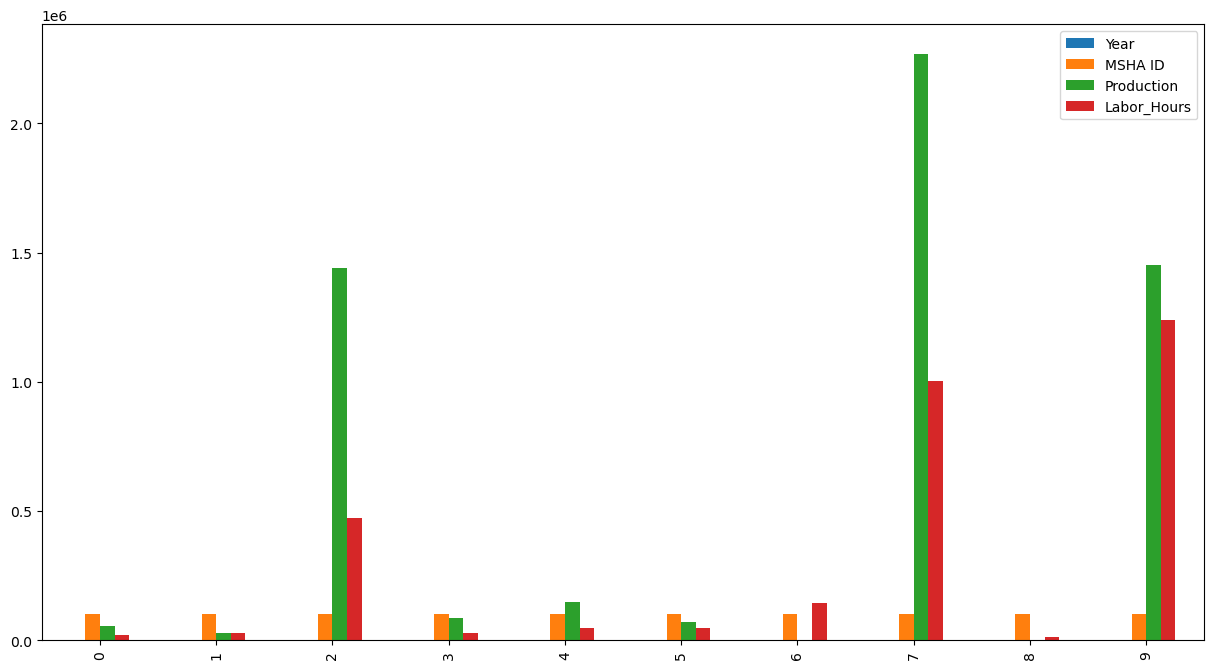

In [69]:
import matplotlib.pyplot as plt

df.head(10).plot(kind='bar', figsize=(15,8))
plt.show()

#### SQL Database Queries

#1. Write a Pandas program to display the first and last name and date of joining of the employees who is either Sales Representative or Sales Man.

In [9]:
employees = pd.read_csv("22_EMPLOYEES.csv")

employees.head()

,employ_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000,NaN,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000,NaN,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000,NaN,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000,NaN,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000,NaN,103.0,60.0


In [15]:
df[(df["job_id"] == "SA_MAN") | (df["job_id"] == "SA_REP")][["first_name", "last_name", "hire_date"]]

,first_name,last_name,hire_date
45,John,Russell,2004-10-01
46,Karen,Partners,2005-01-05
47,Alberto,Errazuriz,2005-03-10
48,Gerald,Cambrault,2007-10-15
49,Eleni,Zlotkey,2008-01-29
50,Peter,Tucker,2005-01-30
51,David,Bernstein,2005-03-24
52,Peter,Hall,2005-08-20
53,Christopher,Olsen,2006-03-30
54,Nanette,Cambrault,2006-12-09


#2. Write a Pandas program to display the details of jobs in descending sequence on job title.

In [16]:
jobs = pd.read_csv("22_JOBS.csv")
jobs.head()

,job_id,job_title,min_salary,max_salary
0,AD_PRES,President,20000,40000
1,AD_VP,Administration Vice President,15000,30000
2,AD_ASST,Administration Assistant,3000,6000
3,FI_MGR,Finance Manager,8200,16000
4,FI_ACCOUNT,Accountant,4200,9000


In [18]:
jobs.sort_values("job_title", ascending=False)

,job_id,job_title,min_salary,max_salary
11,ST_MAN,Stock Manager,5500,8500
12,ST_CLERK,Stock Clerk,2000,5000
13,SH_CLERK,Shipping Clerk,2500,5500
8,SA_REP,Sales Representative,6000,12000
7,SA_MAN,Sales Manager,10000,20000
9,PU_MAN,Purchasing Manager,8000,15000
10,PU_CLERK,Purchasing Clerk,2500,5500
18,PR_REP,Public Relations Representative,4500,10500
6,AC_ACCOUNT,Public Accountant,4200,9000
14,IT_PROG,Programmer,4000,10000


#3.  Write a Pandas program to display the ID for those employees who did two or more jobs in the past.

In [19]:
jobs_hist = pd.read_csv("22_JOB_HISTORY.csv")
jobs_hist.head(3)

,employee_id,start_date,end_date`,job_id,department_id
0,102,1993-01-13,1998-07-24,IT_PROG,60
1,101,1989-09-21,1993-10-27,AC_ACCOUNT,110
2,101,1993-10-28,1997-03-15,AC_MGR,110


In [23]:
res = jobs_hist.groupby("employee_id")

In [58]:
print(f"Employee ids who have done more than one job in the past :\n")
for name, group in res:
    if len(group) > 1:
        print(f"Id: {name}, Jobs done: {len(group)}")

# or else do following
res.filter(lambda x: len(x) > 1).groupby("employee_id").size().sort_values()

Employee ids who have done more than one job in the past :

Id: 101, Jobs done: 2
Id: 176, Jobs done: 2
Id: 200, Jobs done: 2


employee_id
101    2
176    2
200    2
dtype: int64

### 9 Pandas Data Manipulation and Pivoting

#### Pivot Table Exerxises

#1. Write a Pandas program to create a Pivot table and find the maximum and minimum sale value of the items.

In [61]:
sales_data = pd.read_excel("22_SaleData.xlsx")
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Manager     43 non-null     object        
 3   SalesMan    43 non-null     object        
 4   Item        43 non-null     object        
 5   Units       45 non-null     float64       
 6   Unit_price  45 non-null     float64       
 7   Sale_amt    45 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.9+ KB


In [62]:
sales_data.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36.0,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27.0,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56.0,1198.0,67088.0


In [63]:
pd.pivot_table(sales_data, index="Item", values="Sale_amt", aggfunc=["min", "max"])

,min,max
,Sale_amt,Sale_amt
Item,,
Cell Phone,3375.0,21600.0
Desk,250.0,625.0
Home Theater,2000.0,47000.0
Television,8386.0,113810.0
Video Games,936.0,5616.0


#2. Write a Pandas program to create a Pivot table and find the region wise Television and Home Theater sold.

In [99]:
res = pd.pivot_table(sales_data, index=["Region", "Item"], values="Units", aggfunc=["sum"])
res.query("Item == ['Television', 'Home Theater']")

sum
                      Units
Region  Item               
Central Home Theater  424.0
        Television    498.0
East    Home Theater  234.0
        Television    130.0
West    Home Theater   64.0
        Television     88.0

In [100]:
# or do following
res = pd.pivot_table(sales_data, index="Region", values="Units", columns="Item", aggfunc=["sum"])
res["sum"][["Home Theater", "Television"]]

Item,Home Theater,Television
Region,,
Central,424.0,498.0
East,234.0,130.0
West,64.0,88.0


### Pandas Pivot on Titanic Passengers Exercises

#1. Write a Pandas program to create a Pivot table and find the probability of survival by class, gender, solo boarding and port of embarkation.

In [35]:
titanic = pd.read_csv("22_titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Unnamed: 15
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,NaN
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,NaN
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,NaN
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,NaN
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
 15  Unnamed: 15  0 non-null      float64
dtypes: bool(2), float64(3), int64(4), object(7)
memory usage: 99.3+ KB


In [17]:
pd.pivot_table(titanic, index="pclass", values="survived", aggfunc=["mean"])

,mean
,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [18]:
pd.pivot_table(titanic, index="sex", values="survived", aggfunc=["mean"])

,mean
,survived
sex,
female,0.742038
male,0.188908


In [19]:
pd.pivot_table(titanic, index="alone", values="survived", aggfunc=["mean"])

,mean
,survived
alone,
False,0.505650
True,0.303538


In [20]:
pd.pivot_table(titanic, index="embarked", values="survived", aggfunc=["mean"])

,mean
,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


In [22]:
pd.pivot_table(titanic, index=["pclass", "sex", "alone"], values="survived", columns="embarked", aggfunc=["mean"], fill_value=0)

mean                    
embarked                    C         Q         S
pclass sex    alone                              
1      female False  1.000000  1.000000  0.941176
              True   0.944444  0.000000  1.000000
       male   False  0.473684  0.000000  0.407407
              True   0.347826  0.000000  0.326923
2      female False  1.000000  0.000000  0.923077
              True   1.000000  1.000000  0.892857
       male   False  0.166667  0.000000  0.300000
              True   0.250000  0.000000  0.089552
3      female False  0.611111  0.625000  0.327586
              True   0.800000  0.760000  0.466667
       male   False  0.500000  0.100000  0.142857
              True   0.151515  0.068966  0.123762

#2. Write a Pandas program to create a Pivot table and separate the gender according to whether they traveled alone or not to get the probability of survival.

In [28]:
res = pd.pivot_table(titanic, index=["sex", "alone"], values="survived", columns="class", aggfunc=["mean"])

In [29]:
res

mean                    
class            First    Second     Third
sex    alone                              
female False  0.966667  0.931818  0.416667
       True   0.970588  0.906250  0.616667
male   False  0.425532  0.277778  0.180723
       True   0.333333  0.097222  0.121212

#3. Write a Pandas program to create a Pivot table and find number of adult male, adult female and children.

In [39]:
pd.pivot_table(titanic, index="who", values="survived", aggfunc="count")

,survived
who,
child,83
man,537
woman,271


### Pandas Plotting Exercises

#1. Write a Pandas program to create a histogram to visualize daily return distribution of Alphabet Inc. stock price between two specific dates.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("22_alphabet_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,1122.000000,1129.689941,1097.449951,1105.619995,1105.619995,2343100
1,2020-04-02,1098.260010,1126.859985,1096.400024,1120.839966,1120.839966,1964900
2,2020-04-03,1119.015015,1123.540039,1079.810059,1097.880005,1097.880005,2313400
3,2020-04-06,1138.000000,1194.660034,1130.939941,1186.920044,1186.920044,2664700
4,2020-04-07,1221.000000,1225.000000,1182.229980,1186.510010,1186.510010,2387300


In [80]:
start_date = pd.to_datetime('2020-4-1')
end_date = pd.to_datetime('2020-9-30')                         
df['Date'] = pd.to_datetime(df['Date']) 

In [82]:
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
df2 = df1[['Date', 'Adj Close']]
df3 = df2.set_index('Date')
daily_changes = df3.pct_change(periods=1)

C:\Users\KaranJJoshi\AppData\Local\Temp\ipykernel_7284\1587315620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(daily_changes['Adj Close'].dropna(),bins=100,color='purple')


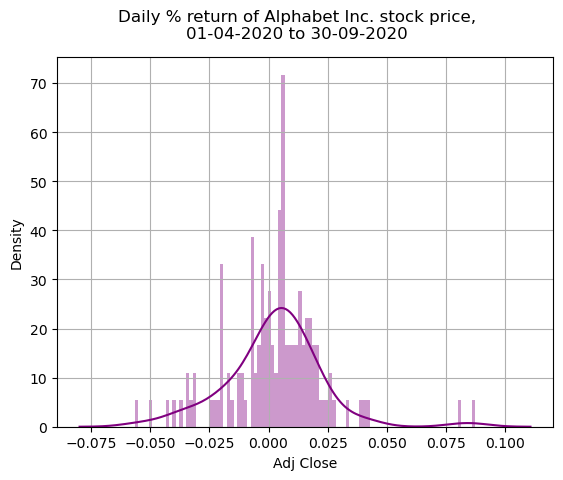

In [84]:
sns.distplot(daily_changes['Adj Close'].dropna(),bins=100,color='purple')
plt.suptitle('Daily % return of Alphabet Inc. stock price,\n01-04-2020 to 30-09-2020', fontsize=12, color='black')
plt.grid(True)
plt.show()

#2. Write a Pandas program to create a bar plot of the trading volume of Alphabet Inc. stock between two specific dates.

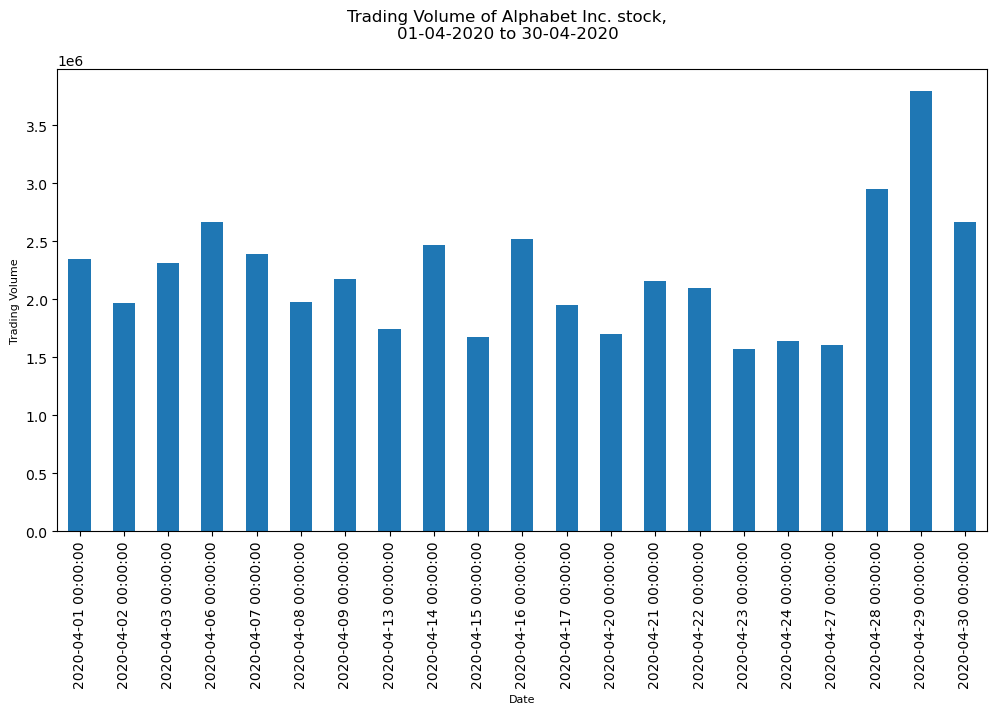

In [91]:
df = pd.read_csv("22_alphabet_stock_data.csv")
start_date = pd.to_datetime('2020-4-1')
end_date = pd.to_datetime('2020-4-30')                         
df['Date'] = pd.to_datetime(df['Date']) 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
df2 = df1.set_index('Date')
plt.figure(figsize=(12,6))
plt.suptitle('Trading Volume of Alphabet Inc. stock,\n01-04-2020 to 30-04-2020', fontsize=12, color='black')
plt.xlabel("Date",fontsize=8, color='black')
plt.ylabel("Trading Volume", fontsize=8, color='black') 
df2['Volume'].plot(kind='bar');
plt.show()

### Pandas Performance Optimization Exercises

#1. Write a Pandas program to measure the time taken to sort a large DataFrame using the sort_values method vs. using a custom sorting function with apply.

In [95]:
import time

num_rows = 1000000
df = pd.DataFrame({
    'A': np.random.randint(0, 100, size=num_rows),
    'B': np.random.randn(num_rows)
})

df.head(3)

,A,B
0,78,1.982575
1,84,1.835453
2,66,-1.910527


In [103]:
start_time = time.time()
sorted_df = df.sort_values(by='A')
end_time = time.time()
sort_values_time = end_time - start_time
print(f"Time taken using sort_values method: {sort_values_time:.6f} seconds")

Time taken using sort_values method: 0.157303 seconds


In [104]:
def sort_custom(df):
    return df.sort_values(by='A')

start_time = time.time()
apply_sorted_df = df.apply(lambda x: x).sort_values(by='A')
end_time = time.time()
apply_time = end_time - start_time

print(f"Time taken using apply method: {apply_time:.6f} seconds")

Time taken using apply method: 0.156798 seconds


### Pandas Advanced Indexing and Slicing

#1. Write a Pandas program that uses MultiIndex to select data based on conditions.

In [113]:
df = pd.DataFrame({
    'X': [1, 6, 8, 3, 7],
    'Y': [5, 2, 9, 4, 1],
    'Z': ['one', 'one', 'two', 'two', 'one']
})
df

,X,Y,Z
0,1,5,one
1,6,2,one
2,8,9,two
3,3,4,two
4,7,1,one


In [127]:
df_cpy = df.set_index(["Z", "X"])
df_cpy

Y
Z   X   
one 1  5
    6  2
two 8  9
    3  4
one 7  1

In [128]:
df_cpy.loc[("one", slice(None))]

,Y
X,
1,5
6,2
7,1


#2. Write a Pandas program to select rows where column 'X' > 5 and column 'Y' < 5.

In [131]:
df[(df["X"] > 5) & (df["Y"] < 5)]

,X,Y,Z
1,6,2,one
4,7,1,one


In [132]:
df.query("X > 5 and Y < 5")

,X,Y,Z
1,6,2,one
4,7,1,one


### Pandas Resampling and Frequency Conversion Exercises

#1. Write a Pandas program to calculate percentage change in Resampled data

In [140]:
date_rng = pd.date_range(start='2021-01-01', end='2021-01-10', freq='D')

In [141]:
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

In [142]:
date_rng

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')

In [143]:
ts

2021-01-01   -1.182076
2021-01-02   -1.070292
2021-01-03   -1.837712
2021-01-04    1.289933
2021-01-05   -0.785757
2021-01-06   -0.286021
2021-01-07    0.232639
2021-01-08   -0.038321
2021-01-09   -1.979889
2021-01-10   -0.558723
Freq: D, dtype: float64

In [144]:
ts_daily = ts.resample("D").mean()

In [145]:
ts_daily.pct_change()

2021-01-01          NaN
2021-01-02    -0.094566
2021-01-03     0.717019
2021-01-04    -1.701923
2021-01-05    -1.609145
2021-01-06    -0.635993
2021-01-07    -1.813362
2021-01-08    -1.164725
2021-01-09    50.665371
2021-01-10    -0.717801
Freq: D, dtype: float64

#2. Write a Pandas program to resample Time Series Data to Yearly Frequency.

In [153]:
date_rng = pd.date_range(start='2017-01-01', end='2022-01-01', freq='ME')
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

In [154]:
date_rng

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
      

In [155]:
ts

2017-01-31   -1.038948
2017-02-28   -1.199766
2017-03-31    0.958073
2017-04-30    1.071216
2017-05-31    0.024257
2017-06-30    1.412306
2017-07-31    1.469506
2017-08-31   -0.517939
2017-09-30   -0.067198
2017-10-31   -0.480798
2017-11-30   -1.124838
2017-12-31   -1.072991
2018-01-31   -1.671489
2018-02-28    0.304337
2018-03-31    2.204458
2018-04-30   -0.062432
2018-05-31   -0.445774
2018-06-30    1.220525
2018-07-31    0.745667
2018-08-31   -0.278376
2018-09-30    0.907698
2018-10-31    0.112946
2018-11-30   -0.614162
2018-12-31   -1.226394
2019-01-31   -0.299359
2019-02-28    0.729563
2019-03-31   -0.511668
2019-04-30    1.276409
2019-05-31   -0.353495
2019-06-30   -0.030634
2019-07-31   -1.558846
2019-08-31    0.424391
2019-09-30   -1.067196
2019-10-31    0.987248
2019-11-30    0.582126
2019-12-31    1.174694
2020-01-31    0.106972
2020-02-29    0.730432
2020-03-31    1.246457
2020-04-30    0.224543
2020-05-31    0.356533
2020-06-30   -0.669193
2020-07-31   -1.168521
2020-08-31 

In [156]:
ts.resample("YE").mean()

2017-12-31   -0.047260
2018-12-31    0.099750
2019-12-31    0.112769
2020-12-31    0.420759
2021-12-31   -0.079813
Freq: YE-DEC, dtype: float64

### Pandas Advanced Grouping and Aggregation Exercises 

#1. GroupBy and Applying Multiple Aggregations with Named Functions:
Write a Pandas program to apply multiple aggregations with named functions in GroupBy for detailed data analysis.

In [158]:
data = {
    'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Value1': [5, 10, 15, 20, 25, 30],
    'Value2': [50, 100, 150, 200, 250, 300]
}

df = pd.DataFrame(data)
df

,Category,Value1,Value2
0,A,5,50
1,A,10,100
2,B,15,150
3,B,20,200
4,C,25,250
5,C,30,300


In [159]:
grouped = df.groupby('Category').agg(
    Total_Value1=('Value1', 'sum'),
    Average_Value2=('Value2', 'mean')
)
grouped

,Total_Value1,Average_Value2
Category,,
A,15,75.0
B,35,175.0
C,55,275.0


In [167]:
res = df.groupby('Category').agg({"Value1": ["sum"], "Value2": ["mean"]})

In [169]:
res.columns = ['Total_Value1', 'Avg_Value2']

In [170]:
res

,Total_Value1,Avg_Value2
Category,,
A,15,75.0
B,35,175.0
C,55,275.0


### Pandas IMDb Movies Queries Exercises

#1. Write a Pandas program to display the movies (title, number of votes) that received specified number of votes.

In [181]:
df = pd.read_csv("22_movies_metadata.csv", encoding="ISO-8859-1", on_bad_lines="skip", usecols=["title", "vote_count"])

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       50 non-null     object 
 1   vote_count  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes


In [183]:
df.head(3)

,title,vote_count
0,Toy Story,5415.0
1,Jumanji,2413.0
2,Grumpier Old Men,92.0


In [184]:
n = 789
df[df["vote_count"] > n]

,title,vote_count
0,Toy Story,5415.0
1,Jumanji,2413.0
5,Heat,1886.0
9,GoldenEye,1194.0
15,Casino,1343.0
18,Ace Ventura: When Nature Calls,1128.0
31,Twelve Monkeys,2470.0
38,Clueless,828.0
46,Se7en,5915.0
47,Pocahontas,1509.0


#2. Write a Pandas program to display the movies (title, runtime) longer than 30 minutes and shorter than 360 minutes.

In [185]:
df = pd.read_csv("22_movies_metadata.csv", encoding="ISO-8859-1", on_bad_lines="skip")

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  49 non-null     bool   
 1   belongs_to_collection  10 non-null     object 
 2   budget                 49 non-null     int64  
 3   genres                 49 non-null     object 
 4   homepage               5 non-null      object 
 5   id                     49 non-null     int64  
 6   imdb_id                49 non-null     object 
 7   original_language      49 non-null     object 
 8   original_title         49 non-null     object 
 9   overview               48 non-null     object 
 10  popularity             49 non-null     float64
 11  poster_path            49 non-null     object 
 12  production_companies   49 non-null     object 
 13  production_countries   49 non-null     object 
 14  release_date           49 non-null     object 
 15  revenue 

In [187]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92


In [198]:
res = df[(df["runtime"] > 30.0) & (df["runtime"] < 360.0)]
res.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92


In [203]:
res[["title", "runtime"]].sort_values("runtime")

,title,runtime
31,Wings of Courage,50.0
35,Across the Sea of Time,51.0
12,Balto,78.0
0,Toy Story,81.0
46,Pocahontas,81.0
11,Dracula: Dead and Loving It,88.0
32,Babe,89.0
18,Ace Ventura: When Nature Calls,90.0
47,When Night Is Falling,96.0
37,Clueless,97.0


### Mastering Pandas Exercises

In [204]:
#1. Create a DataFrame and calculate the expanding sum for each group.

In [206]:
data = {'X': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 'Y': range(10)}
df = pd.DataFrame(data)
df.head()

,X,Y
0,foo,0
1,bar,1
2,foo,2
3,bar,3
4,foo,4


In [207]:
df['Expanding_Sum'] = df.groupby('X')['Y'].expanding().sum().reset_index(level=0, drop=True)
df

,X,Y,Expanding_Sum
0,foo,0,0.0
1,bar,1,1.0
2,foo,2,2.0
3,bar,3,4.0
4,foo,4,6.0
5,bar,5,9.0
6,foo,6,12.0
7,bar,7,16.0
8,foo,8,20.0
9,bar,9,25.0


#2. Create a DataFrame and calculate the cumulative product for each group.

In [208]:
data = {'X': ['foo', 'bar', 'foo', 'bar'], 'Y': [1, 2, 3, 4]}
df = pd.DataFrame(data)
df

,X,Y
0,foo,1
1,bar,2
2,foo,3
3,bar,4


In [209]:
df['Cumulative_Product'] = df.groupby('X')['Y'].cumprod()

In [210]:
df

,X,Y,Cumulative_Product
0,foo,1,1
1,bar,2,2
2,foo,3,3
3,bar,4,8


### Pandas Pracrice Set-1 Exercises

In [212]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [213]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#1. Write a Pandas program to count the duplicate rows of diamonds DataFrame.

In [215]:
diamonds.duplicated().sum()

146

#2. Write a Pandas program to get sample 75% of the diamonds DataFrame's rows without replacement and store the remaining 25% of the rows in another DataFrame.

In [223]:
diamonds.shape

(53940, 10)

In [217]:
res = diamonds.sample(frac=0.75, random_state=99)
res.shape

(40455, 10)

In [221]:
diamonds.loc[~diamonds.index.isin(res.index), :].shape

(13485, 10)

#3. Write a Pandas program to calculate the mean of each numeric column of diamonds DataFrame.

In [227]:
pd.pivot_table(diamonds, index="cut", values=["carat", "depth", "table", "price", "x", "y", "z"], aggfunc="mean")

,carat,depth,price,table,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,4358.757764,59.053789,6.246894,6.182652,3.982770
Good,0.849185,62.365879,3928.864452,58.694639,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,3457.541970,55.951668,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,4584.257704,58.746095,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,3981.759891,57.956150,5.740696,5.770026,3.559801


In [231]:
diamonds.mean(numeric_only=True)

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64